### Análise e Previsão de Ataque Cardíaco

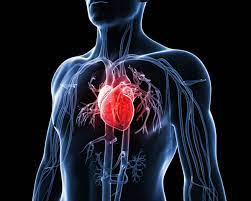

Descrição de dados :

Idade: idade do paciente [anos] 

Sexo: sexo do paciente [M: Masculino, F: Feminino] 

ChestPainType: tipo de dor no peito 

  - TA: Angina Típica, 
  - ATA: Angina Atípica, 
  - NAP: Dor Não Anginosa, 
  - ASY: Assintomático
  
PA em repouso: pressão arterial em repouso [mm Hg] 

Colesterol: colesterol sérico [mm/dl] 

Em jejum: glicemia em jejum 
  - 1: se em jejumBS > 120 mg/dl, 
  - 0: caso contrário 

ECG em repouso: resultados do eletrocardiograma em repouso 

  - Normal : Normal, 
  - ST: com anormalidade da onda 
  - ST-T (inversões da onda T e/ou elevação ou depressão de ST > 0,05 mV), 
  - HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes
  
MaxHR: frequência cardíaca máxima alcançada [Numeric valor entre 60 e 202] 

ExerciseAngina: angina induzida pelo exercício [Y: Sim, N: No] 

Oldpeak: pico antigo = ST [Valor numérico medido em depressão] 

ST_Slope: a inclinação do pico do exercício segmento ST 
  - Up: ascendente, 
  - Flat: flat, 
  - Down: descendo 
  
HeartDisease: classe de saída 
  - 1: doença cardíaca,
  - 0: Normal

As doenças cardiovasculares (DCVs) são a causa número 1 de morte em todo o mundo, levando cerca de 17,9 milhões de vidas a cada ano, o que representa 31% de todas as mortes em todo o mundo. Quatro das mortes por 5CVD são devido a ataques cardíacos e derrames, e um terço dessas mortes ocorre prematuramente em pessoas com menos de 70 anos de idade. A insuficiência cardíaca é um evento comum causado por DCV e este conjunto de dados contém 11 características que podem ser usadas para prever uma possível doença cardíaca. Pessoas com doença cardiovascular ou com alto risco cardiovascular (devido à presença de um ou mais fatores de risco, como hipertensão, diabetes, hiperlipidemia ou doença já estabelecida) precisam de detecção e gerenciamento precoces, onde um modelo de aprendizado de máquina pode ser de grande ajuda.

### Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### Verficando os dados

In [ ]:
df = pd.read_csv('/content/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
print(df.columns)

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')


Verificar valores ausentes (NaN)

In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Verificar tipos de dados da cada coluna

In [ ]:
print(df.dtypes)
print('-'*26)
print(df.iloc[0])

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object
--------------------------
Age                   40
Sex                    M
ChestPainType        ATA
RestingBP            140
Cholesterol          289
FastingBS              0
RestingECG        Normal
MaxHR                172
ExerciseAngina         N
Oldpeak              0.0
ST_Slope              Up
HeartDisease           0
Name: 0, dtype: object


### Análise Exploratória e Tratamento de OutLiers

Análise Exploratória e Tratar Outliers
- Vamos analisar as feature para:

1 - Ver a correlação entre as features.

2 - Excluir outliers 

3 - Confirmar se todas as features que temos fazem realmente sentido.

- Vamos começar pelas colunas numéricas.

- Em seguida, vamos avaliar as colunas de texto e definir quais categorias fazem sentido mantermos ou não.

In [ ]:
# Vamos analisar a correlação entre todas colunas, usando a função 'corr()'
print(df.corr())

                   Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


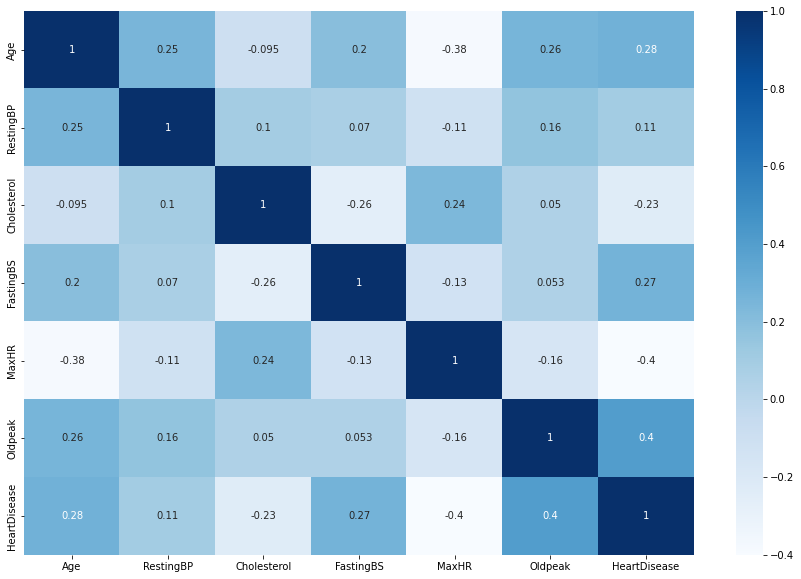

In [ ]:
# Iremos visualizar a correlação entre as colunas utilizando um 'Mapa de Calor'
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

### Definição de Funções

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Funções para definir os limites dos outliers e exckuir outliers


In [ ]:
def limites(coluna):
  q1 = coluna.quantile(0.25)
  q3 = coluna.quantile(0.75)
  IQR = q3 - q1
  return q1-1.5*IQR, q3+1.5*IQR

In [ ]:
def excluir_outliers(df, nome_coluna):
   qtde_linhas = df.shape[0]
   lim_inf, lim_sup = limites(df[nome_coluna])
   df = df.loc[(df[nome_coluna] > lim_inf) & (df[nome_coluna] <= lim_sup), :]
   linhas_removidas = qtde_linhas - df.shape[0]
   return df, linhas_removidas

Criar funções para impressão de gráficos

In [ ]:
def box_plot(coluna):
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(15, 5)
  sns.boxplot(x=coluna, ax=ax1)
  ax2.set_xlim(limites(coluna))
  sns.boxplot(x=coluna, ax=ax2)

def hist(coluna):
  plt.figure(figsize=(15,5))
  sns.distplot(coluna, hist=True)

def bar_plot(coluna):
  plt.figure(figsize=(15,5))
  ax = sns.barplot(x = coluna.value_counts().index , y = coluna.value_counts())
  ax.set_xlim(limites(coluna))

Age

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


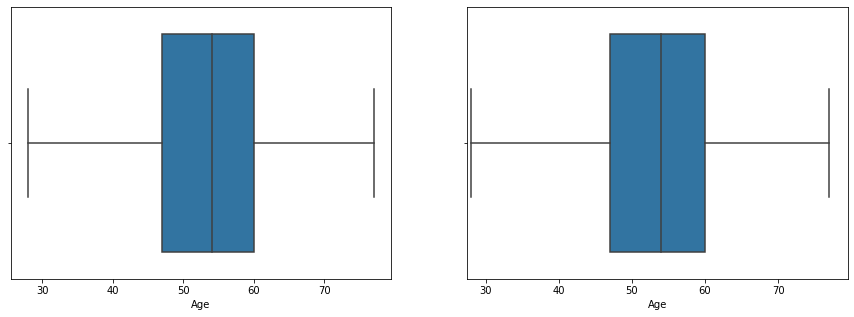

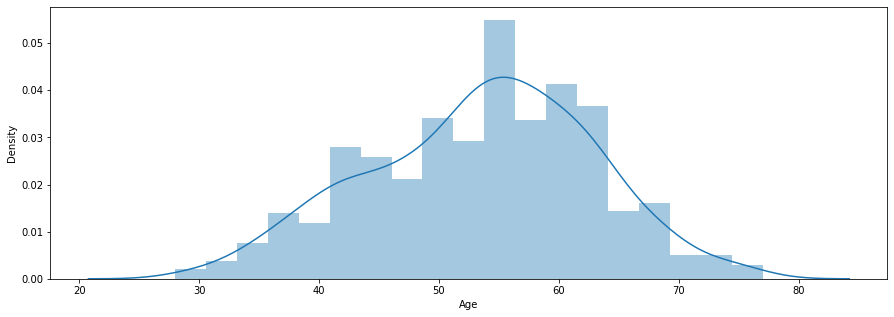

In [ ]:
box_plot(df['Age'])
hist(df['Age'])

RestingBP

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


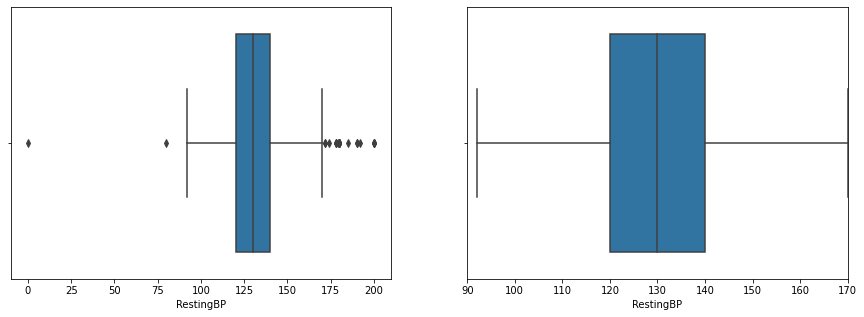

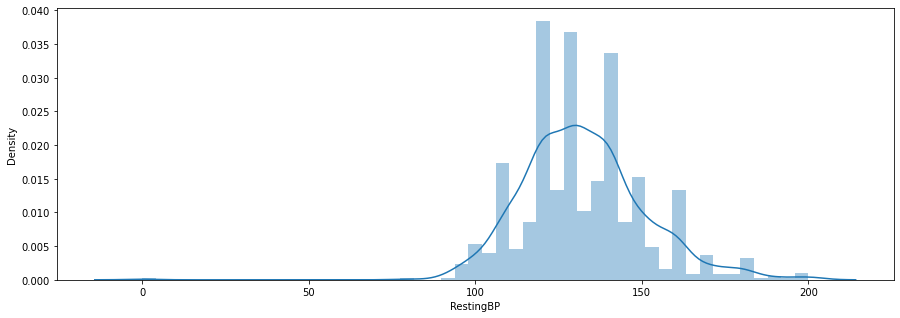

In [ ]:
box_plot(df['RestingBP'])
hist(df['RestingBP'])

Removendo dados que a PA é igual a 0

In [ ]:
df.query('RestingBP==0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1


In [ ]:
df.drop(df.loc[df['RestingBP']==0].index, inplace=True)

In [ ]:
df.shape

(917, 12)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


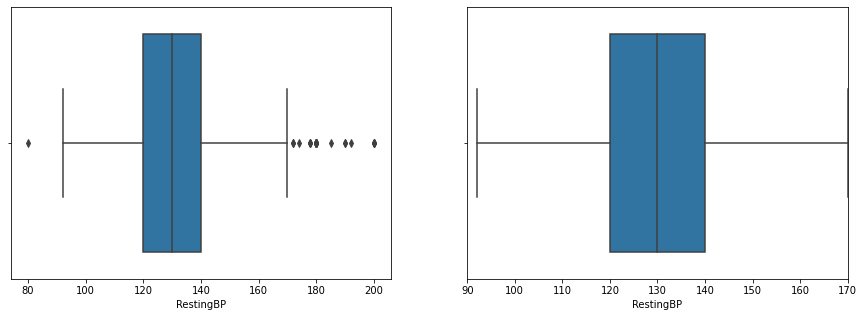

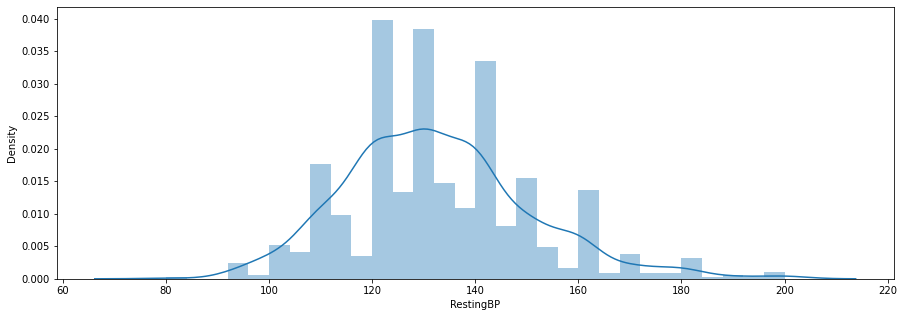

In [ ]:
box_plot(df['RestingBP'])
hist(df['RestingBP'])

Cholesterol

(34.5, 406.5)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


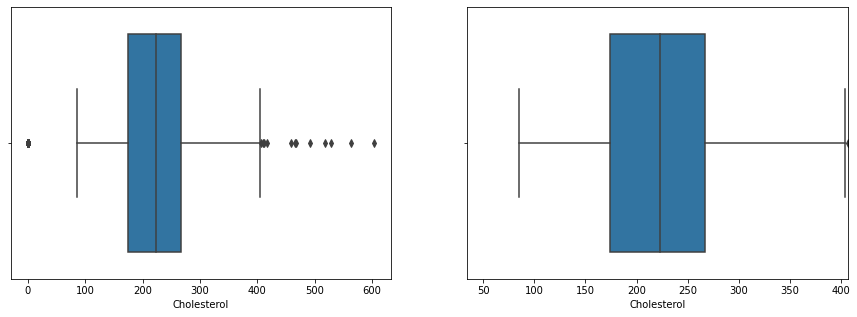

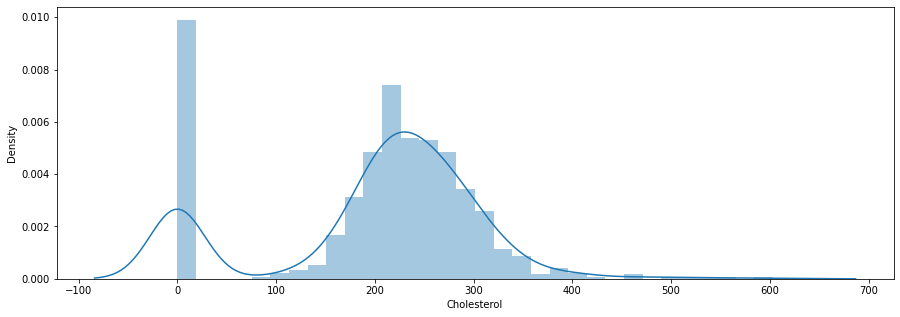

In [ ]:
print(limites(df['Cholesterol']))
box_plot(df['Cholesterol'])
hist(df['Cholesterol'])

In [ ]:
# Excluindo os outliers
df, linhas_removidas = excluir_outliers(df, 'Cholesterol')
print('{} linhas removidas'.format(linhas_removidas))

183 linhas removidas


(734, 12)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


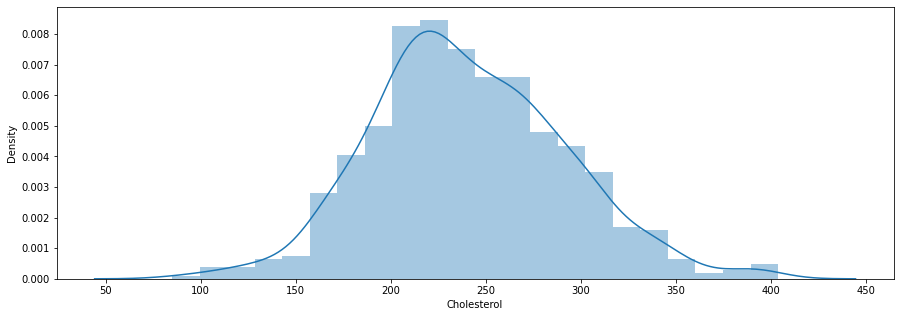

In [ ]:
hist(df['Cholesterol'])
print(df.shape)

FastingBS

(0.0, 0.0)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  """
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


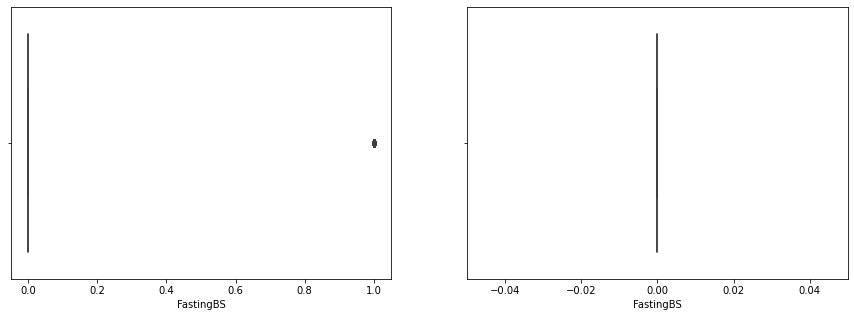

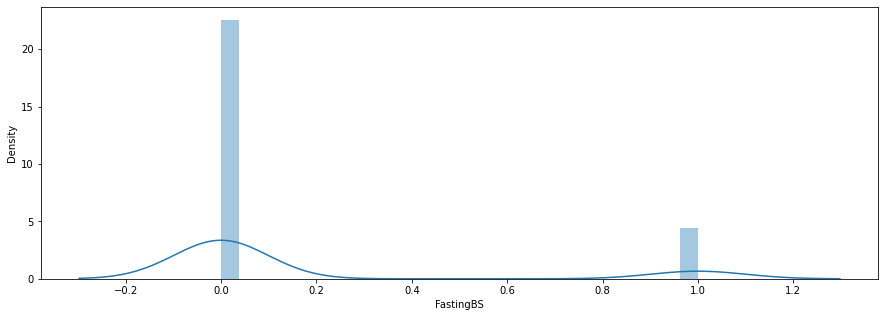

In [ ]:
print(limites(df['FastingBS']))
box_plot(df['FastingBS'])
hist(df['FastingBS'])

MaxHR

(65.0, 217.0)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


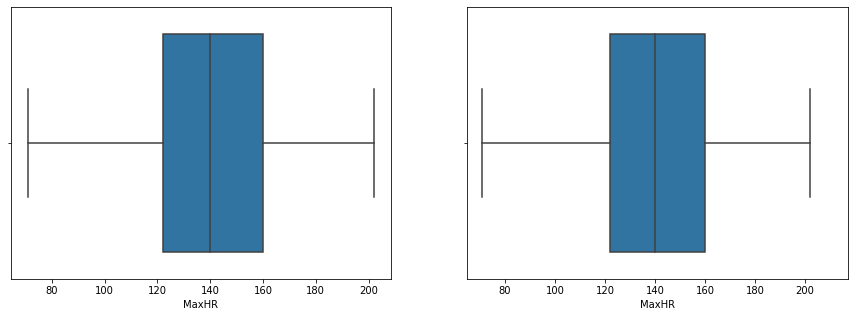

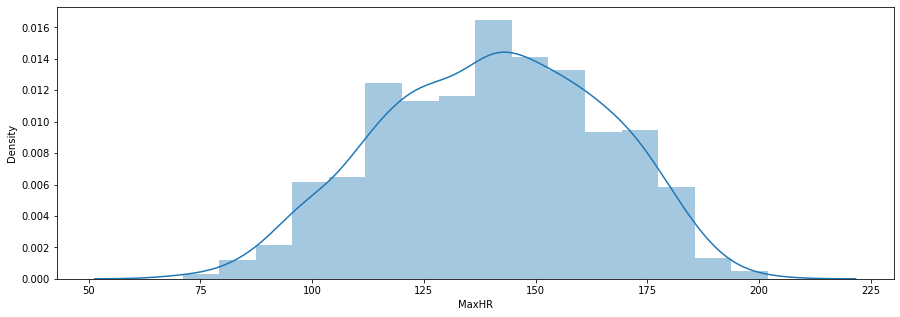

In [ ]:
print(limites(df['MaxHR']))
box_plot(df['MaxHR'])
hist(df['MaxHR'])

Oldpeak

(-2.25, 3.75)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


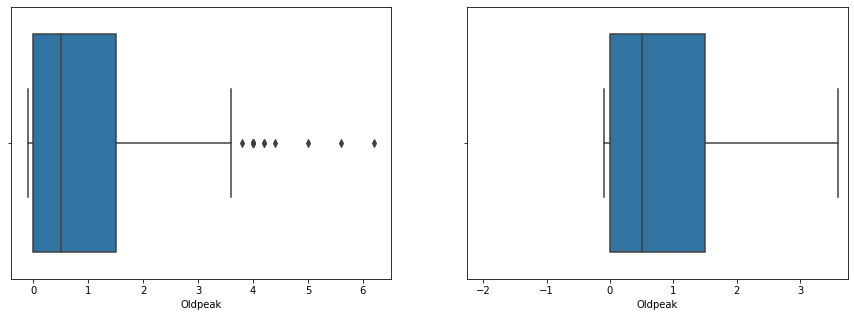

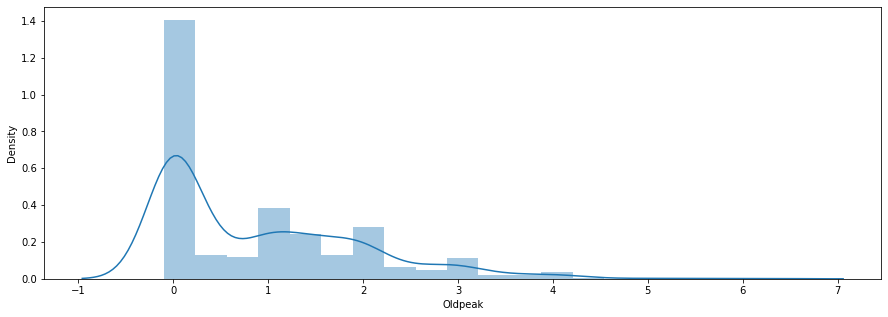

In [ ]:
print(limites(df['Oldpeak']))
box_plot(df['Oldpeak'])
hist(df['Oldpeak'])

Removendo valores menor que 0

In [ ]:
df.query('Oldpeak<0')

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
512,35,M,NAP,123,161,0,ST,153,N,-0.1,Up,0


In [ ]:
df.drop(df.loc[df['Oldpeak']<0].index, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


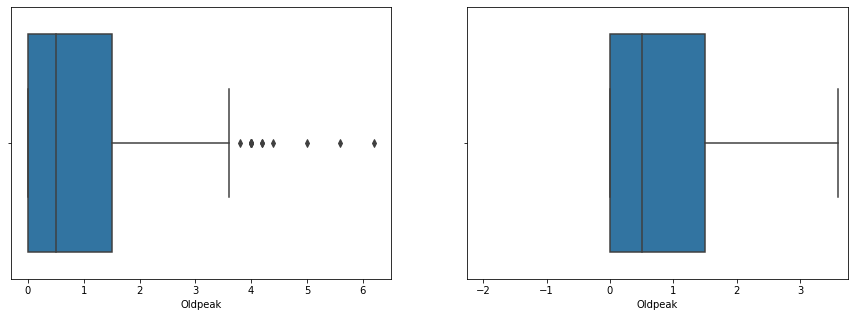

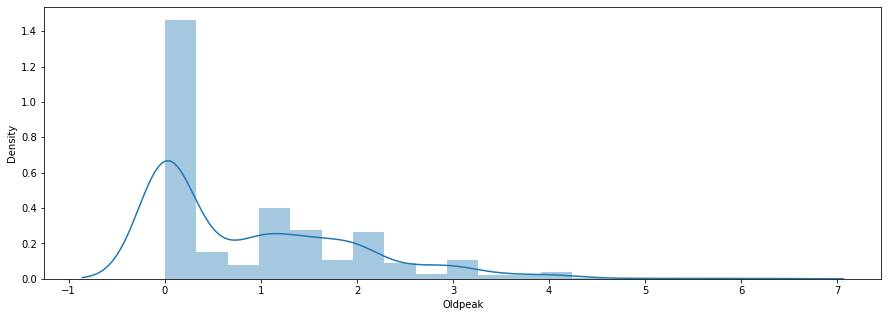

In [ ]:
box_plot(df['Oldpeak'])
hist(df['Oldpeak'])

HeartDisease

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


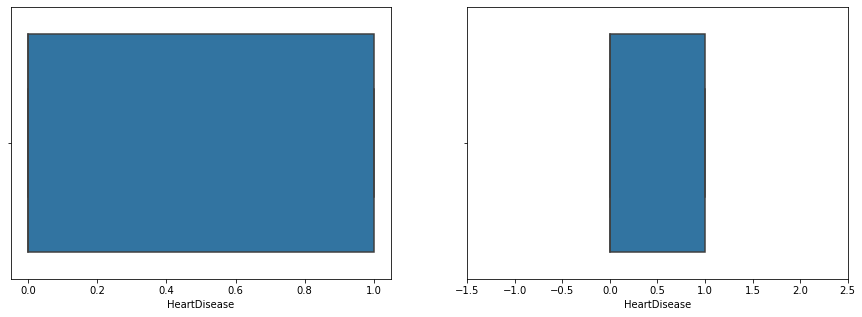

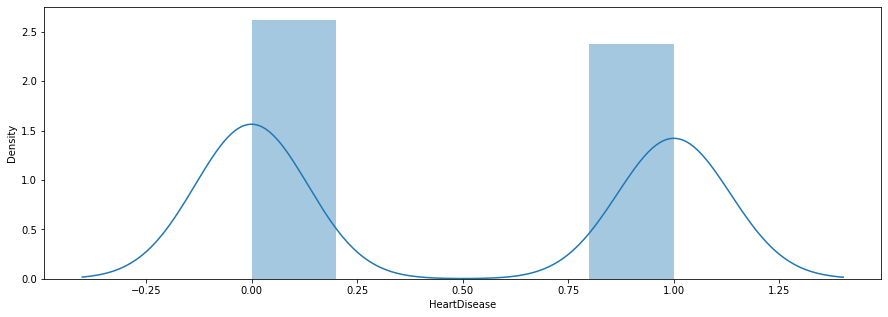

In [ ]:
box_plot(df['HeartDisease'])
hist(df['HeartDisease'])

### Tratamento de colunas com valores de texto

Sex

M    556
F    177
Name: Sex, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


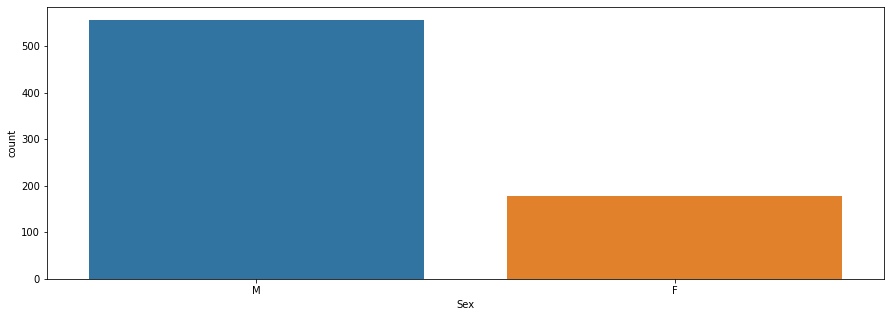

In [ ]:
print(df['Sex'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('Sex', data=df)
grafico.tick_params(axis='x', rotation=0)

ChestPainType

ASY    362
ATA    165
NAP    165
TA      41
Name: ChestPainType, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


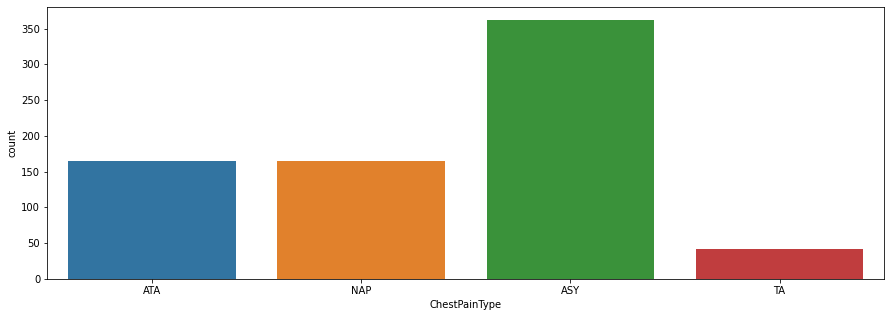

In [ ]:
print(df['ChestPainType'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('ChestPainType', data=df)
grafico.tick_params(axis='x', rotation=0)

RestingECG

Normal    437
LVH       172
ST        124
Name: RestingECG, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


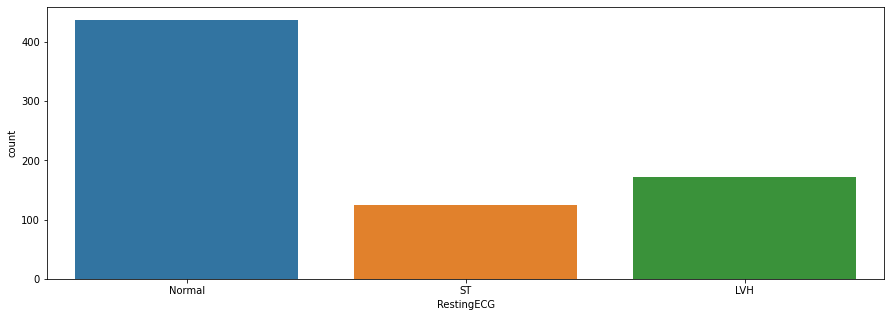

In [ ]:
print(df['RestingECG'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('RestingECG', data=df)
grafico.tick_params(axis='x', rotation=0)

ExerciseAngina

N    449
Y    284
Name: ExerciseAngina, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


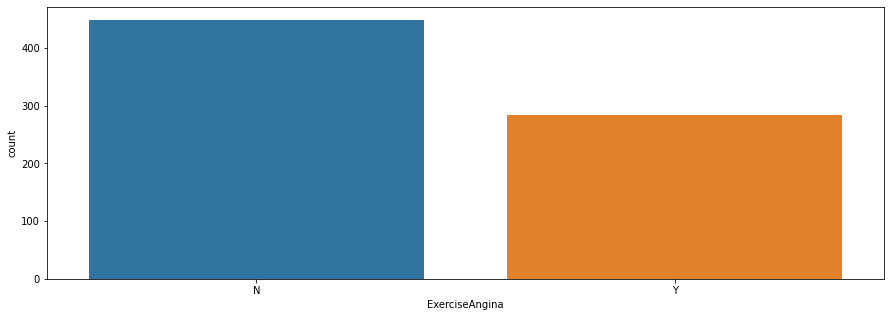

In [ ]:
print(df['ExerciseAngina'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('ExerciseAngina', data=df)
grafico.tick_params(axis='x', rotation=0)

ST_Slope

Flat    346
Up      345
Down     42
Name: ST_Slope, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


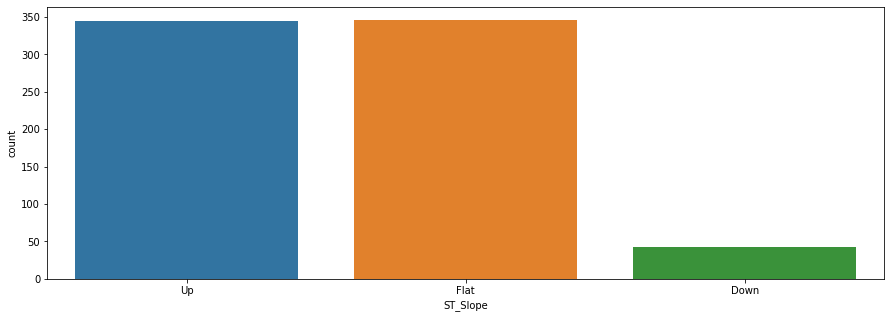

In [ ]:
print(df['ST_Slope'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot('ST_Slope', data=df)
grafico.tick_params(axis='x', rotation=0)

### Encoding

### Encoding

Precisamor Ajustar as features para facilitar o trabalho do modelo futuro (features de categoria, M e F, Y e N, etc.)

- Features de Valores True ou False, vamos substituir True por 1 e False por 0.
- Features de Categoria (features em que os valores da coluna são textos) vamos utilizar o método de encoding de variáveis dummies

Importando bibliotecas

In [ ]:
df_cod = df.copy()

In [ ]:
colunas_categorias = ['Sex', 'ExerciseAngina', 'ChestPainType', 'RestingECG', 'ST_Slope']
df_cod = pd.get_dummies(data=df_cod, columns=colunas_categorias)
display(df_cod.head())

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df_cod.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 733 entries, 0 to 917
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                733 non-null    int64  
 1   RestingBP          733 non-null    int64  
 2   Cholesterol        733 non-null    int64  
 3   FastingBS          733 non-null    int64  
 4   MaxHR              733 non-null    int64  
 5   Oldpeak            733 non-null    float64
 6   HeartDisease       733 non-null    int64  
 7   Sex_F              733 non-null    uint8  
 8   Sex_M              733 non-null    uint8  
 9   ExerciseAngina_N   733 non-null    uint8  
 10  ExerciseAngina_Y   733 non-null    uint8  
 11  ChestPainType_ASY  733 non-null    uint8  
 12  ChestPainType_ATA  733 non-null    uint8  
 13  ChestPainType_NAP  733 non-null    uint8  
 14  ChestPainType_TA   733 non-null    uint8  
 15  RestingECG_LVH     733 non-null    uint8  
 16  RestingECG_Normal  733 non

In [ ]:
display(df_cod)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ExerciseAngina_N,...,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,1,...,0,1,0,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,1,...,0,1,0,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,1,0,0,...,1,0,0,0,0,1,0,0,1,0
4,54,150,195,0,122,0.0,0,0,1,1,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,...,1,0,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
916,57,130,236,0,174,0.0,1,1,0,1,...,0,1,0,0,1,0,0,0,1,0


### Modelo de Previsão



Importando bibliotecas para as métricas de avaliação

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

Metricas de Avaliação

In [ ]:
def avaliar_modelo(nome_modelo, y_test, previsao):
  Accuracy = accuracy_score(y_test, previsao)
  Precisao = precision_score(y_test, previsao)
  Recall = recall_score(y_test, previsao)
  F1 = f1_score(y_test, previsao)
  return f'Modelo {nome_modelo}:\nAccuracy:{Accuracy:.2%}\nPrecision:{Precisao:.2%}\nRecall:{Recall:.2%}\nF1_score:{F1:.2%}'


### Modelos utilizados

- LogisticRegression
- KNeighborsClassifier
- DecisionTreeClassifier
- RandomForestClassifier
- GaussianNB

Importando bibliotecas dos modelos

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo_lr = LogisticRegression(solver = 'lbfgs', max_iter = 100)
modelo_knc = KNeighborsClassifier(n_neighbors=6)
modelo_dtc = DecisionTreeClassifier()
modelo_rfc = RandomForestClassifier(n_estimators=100)
modelo_gnb = GaussianNB()


modelos = {'LogisticRegression': modelo_lr,
           'KNeighborsClassifier': modelo_knc,
           'DecisionTreeClassifier': modelo_dtc,
           'RandomForestClassifier': modelo_rfc,
           'GaussianNB': modelo_gnb
           }

y = df_cod['HeartDisease']
X = df_cod.drop('HeartDisease', axis=1)

Separando os dados em treino e teste, e treinando o modelo

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(X)
X_train_std=std_scaler.transform(X_train)
X_test_std=std_scaler.transform(X_test)

In [ ]:

for nome_modelo, modelo in modelos.items():
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo, y_test, previsao))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Modelo LogisticRegression:
Accuracy:85.33%
Precision:85.56%
Recall:84.62%
F1_score:85.08%
Modelo KNeighborsClassifier:
Accuracy:58.70%
Precision:60.56%
Recall:47.25%
F1_score:53.09%
Modelo DecisionTreeClassifier:
Accuracy:80.98%
Precision:84.15%
Recall:75.82%
F1_score:79.77%
Modelo RandomForestClassifier:
Accuracy:86.41%
Precision:88.37%
Recall:83.52%
F1_score:85.88%
Modelo GaussianNB:
Accuracy:84.24%
Precision:86.05%
Recall:81.32%
F1_score:83.62%


### Ajustes no Melhor Modelo


In [ ]:
print(modelo_rfc.feature_importances_)

[0.07852103 0.06097381 0.07343142 0.01112181 0.08872924 0.11541052
 0.01912045 0.02030657 0.05681292 0.05045394 0.0807386  0.01620695
 0.01353047 0.00718341 0.01441436 0.01119556 0.00905632 0.00671014
 0.08853081 0.17755169]


In [ ]:
print(X_train.columns)

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ExerciseAngina_N', 'ExerciseAngina_Y',
       'ChestPainType_ASY', 'ChestPainType_ATA', 'ChestPainType_NAP',
       'ChestPainType_TA', 'RestingECG_LVH', 'RestingECG_Normal',
       'RestingECG_ST', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [ ]:
importancia_features = pd.DataFrame(modelo_rfc.feature_importances_, X_train.columns)
display(importancia_features)

,0
Age,0.078521
RestingBP,0.060974
Cholesterol,0.073431
FastingBS,0.011122
MaxHR,0.088729
Oldpeak,0.115411
Sex_F,0.019120
Sex_M,0.020307
ExerciseAngina_N,0.056813
ExerciseAngina_Y,0.050454


In [ ]:
importancia_features = importancia_features.sort_values(by=0, ascending=False)
display(importancia_features)

,0
ST_Slope_Up,0.177552
Oldpeak,0.115411
MaxHR,0.088729
ST_Slope_Flat,0.088531
ChestPainType_ASY,0.080739
Age,0.078521
Cholesterol,0.073431
RestingBP,0.060974
ExerciseAngina_N,0.056813
ExerciseAngina_Y,0.050454


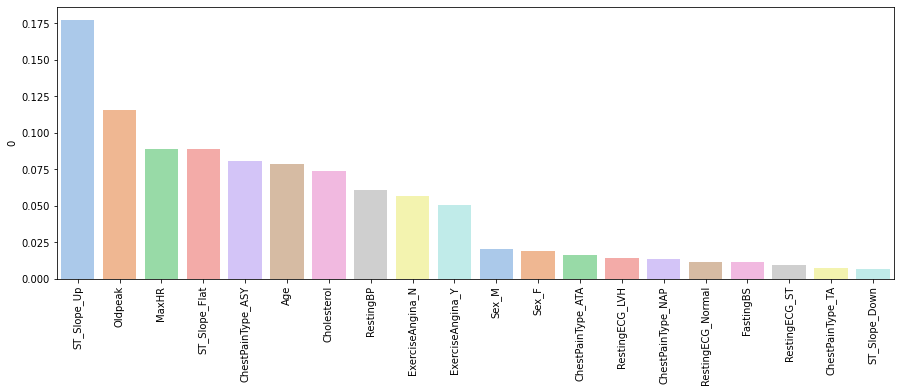

In [ ]:
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0], palette='pastel')
ax.tick_params(axis='x', rotation=90)

### Modelo com melhor resultado:

* Modelo RandomForestClassifier:
    - Accuracy: 86.41% (accuracy é a fração de previsões que nosso modelo acertou)
    - Precision: 88.37% (proporção de identificações positivas que estava realmente correta)
    - Recall: 83.52% (proporção de positivos reais foi identificada corretamente)
    - F1_score: 85.88% (F1 atinge seu melhor valor em 1 e pior escore em 0)